## This is from Hands On Machine Learning at https://github.com/ageron/handson-ml
<br />

### Dataset obtained from kaggle.com and stored in datasets/titanic/train.csv and test.csv
### The goal is to use machine learning and classifiers to determine/predict if a passenger will survive given his/her features

In [1]:
import os
TITANIC_PATH = os.path.join('datasets', 'titanic')


In [2]:
import pandas as pd
def load_titanic_data(filename, titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data('train.csv')
test_data = load_titanic_data('test.csv')

Looking at the data to get a feel of what it contains

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 12 attributes some are numeric and some are categorical <br />
There are some missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age has some missing values, the median age can be placed here <br />
There are many missing values for Cabin, this feature will be dropped since it is of little importance <br />
There are two missing values of Embarked, this feature will most likely also be dropped

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Seperate survivors and none survivors

In [34]:
survived = train_data[train_data['Survived'] == 1]
survived_percent = "{0:.2f}%".format((len(survived)/ len(train_data)) * 100)
died = train_data[train_data['Survived'] == 0]
died_percent = "{0:.2f}%".format((len(died)/len(train_data))*100)
print('Survivers:\t', len(survived), survived_percent)
print('Non-survivers:\t', len(died), died_percent)

Survivers:	 342 38.38%
Non-survivers:	 549 61.62%


### Seperate male and female

In [43]:
male_passengers = train_data[train_data['Sex'] == 'male']
female_passengers = train_data[train_data['Sex'] == 'female']

male_survivors = survived[survived['Sex'] == 'male']
male_survivors_percent = "{0:.2f}%".format((len(male_survivors)/len(survived))*100)
female_survivors = survived[survived['Sex'] == 'female']
female_survivors_percent = "{0:.2f}%".format((len(female_survivors)/len(survived))*100)

male_non_survivors = died[died['Sex'] == 'male']
male_non_survivors_percent = "{0:.2f}%".format((len(male_non_survivors)/len(died))*100)
female_non_survivors = died[died['Sex'] == 'female']
female_non_survivors_percent = "{0:.2f}%".format((len(female_non_survivors)/len(died))*100)

print('Out of 891 passengers', len(survived), '(', survived_percent, ')', 'survived and', len(died), '(', died_percent, ')', 'did not')
print()
print('Out of the', len(survived), 'survivors', len(male_survivors), '(', male_survivors_percent, ')', 'were male and', len(female_survivors), '(', female_survivors_percent, ')', 'were female')
print()
print('Out of the', len(died), 'non survivors', len(male_non_survivors), '(', male_non_survivors_percent, ')', 'were male and', len(female_non_survivors), '(', female_non_survivors_percent, ')', 'were female')


Out of 891 passengers 342 ( 38.38% ) survived and 549 ( 61.62% ) did not

Out of the 342 survivors 109 ( 31.87% ) were male and 233 ( 68.13% ) were female

Out of the 549 non survivors 468 ( 85.25% ) were male and 81 ( 14.75% ) were female


In [49]:
print('Female passengers by class:\n' + str(female_passengers['Pclass'].value_counts()))
print('Non-survivor female passengers by class:\n' + str(female_non_survivors['Pclass'].value_counts()))
print('Survived female passengers by class:\n' + str(female_survivors['Pclass'].value_counts()))

Female passengers by class:
3    144
1     94
2     76
Name: Pclass, dtype: int64
Non-survivor female passengers by class:
3    72
2     6
1     3
Name: Pclass, dtype: int64
Survived female passengers by class:
1    91
3    72
2    70
Name: Pclass, dtype: int64


In [48]:
print('Male passengers by class:\n' + str(male_passengers['Pclass'].value_counts()))
print('Non-survivor male passengers by class:\n' + str(male_non_survivors['Pclass'].value_counts()))
print('Survived male passengers by class:\n' + str(male_survivors['Pclass'].value_counts()))

Male passengers by class:
3    347
1    122
2    108
Name: Pclass, dtype: int64
Non-survivor male passengers by class:
3    300
2     91
1     77
Name: Pclass, dtype: int64
Survived male passengers by class:
3    47
1    45
2    17
Name: Pclass, dtype: int64


It seems that a disproportionate number of 3rd class passengers died while the survivors look to be pretty uniformly distributed (except survived male passengers where 2nd class is very under represented)

In [8]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Preprocess the data

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

#A class to select categorical or numerical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])),
    ('imputer', SimpleImputer(strategy='median')),
])

In [13]:
#num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [53]:
num_pipeline.fit_transform(female_passengers)

array([[38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       [35.    ,  1.    ,  0.    , 53.1   ],
       ...,
       [39.    ,  0.    ,  5.    , 29.125 ],
       [19.    ,  0.    ,  0.    , 30.    ],
       [27.    ,  1.    ,  2.    , 23.45  ]])

#### Imputer for string categorical columns

In [54]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
    ('imputer', MostFrequentImputer()),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [16]:
#cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [56]:
cat_pipeline.fit_transform(female_passengers)

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [57]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [18]:
#X_train = preprocess_pipeline.fit_transform(train_data)
#X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [58]:
X_train = preprocess_pipeline.fit_transform(female_passengers)
X_train

array([[38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       [35.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [39.,  0.,  5., ...,  0.,  1.,  0.],
       [19.,  0.,  0., ...,  0.,  0.,  1.],
       [27.,  1.,  2., ...,  0.,  0.,  1.]])

In [19]:
#y_train = train_data['Survived']
#y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [60]:
y_train = female_passengers['Survived']
y_train

1      1
2      1
3      1
8      1
9      1
10     1
11     1
14     0
15     1
18     0
19     1
22     1
24     0
25     1
28     1
31     1
32     1
38     0
39     1
40     0
41     0
43     1
44     1
47     1
49     0
52     1
53     1
56     1
58     1
61     1
      ..
807    0
809    1
813    0
816    0
820    1
823    1
829    1
830    1
835    1
842    1
849    1
852    0
853    1
854    0
855    1
856    1
858    1
862    1
863    0
865    1
866    1
871    1
874    1
875    1
879    1
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

### Training

#### SVC

In [61]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [22]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7712090664711633

In [63]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#gamma_range = np.logspace(-9, 3, 13)

#param_grid = [{'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': gamma_range}]

#grid_search = GridSearchCV(svm_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

#grid_search.best_params_

In [25]:
#grid_search.best_score_

In [64]:
svm_clf = SVC(C=100, gamma=0.001, kernel='rbf')
svm_clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.79008431085044

In [66]:
svm_scores

array([0.81818182, 0.6875    , 0.75      , 0.77419355, 0.87096774,
       0.77419355, 0.80645161, 0.83870968, 0.77419355, 0.80645161])

In [29]:
#gamma_range

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
print(forest_scores.mean())
forest_scores


0.80993096285435


array([0.75757576, 0.65625   , 0.75      , 0.77419355, 0.96774194,
       0.80645161, 0.83870968, 0.83870968, 0.90322581, 0.80645161])

In [68]:
param_grid = [{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 
               'max_depth': [None, 10, 20], 'max_features': [11, 'auto'], 'min_samples_split': [5, 10, 50]}]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   26.9s finished
C:\ProgramData\Anaconda3_5\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 11,
 'min_samples_split': 5}

In [69]:
grid_search.best_score_

0.8280254777070064

In [73]:
female_forest_clf = RandomForestClassifier(n_estimators=80, random_state=42, bootstrap=True, criterion='gini', max_depth=10, max_features=11, min_samples_split=5)
forest_scores = cross_val_score(female_forest_clf, X_train, y_train, cv=10)
print(forest_scores.mean())
forest_scores

0.8133522727272728


array([0.72727273, 0.6875    , 0.71875   , 0.80645161, 0.96774194,
       0.83870968, 0.87096774, 0.83870968, 0.87096774, 0.80645161])

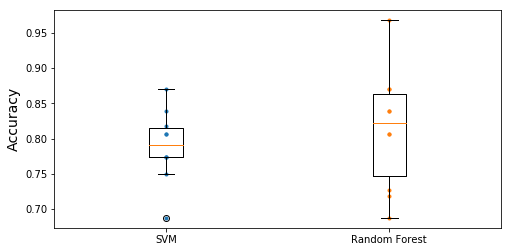

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [55]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [56]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [57]:
forest_clf.fit(X_train, y_train)
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
test_data['PassengerId']
#X_test


0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [77]:
with open('titanic_submission.csv', 'w') as file:
    file.write('PassengerId,Survived\n')
    for i in range(len(test_data)):
        file.write(str(test_data['PassengerId'][i]) + ',' + str(y_pred[i]) + '\n')
    